<a href="https://www.kaggle.com/code/uvinir/imdb-dataset-text-preprocessing-fundamentals?scriptVersionId=113606215" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [26]:
#reading in the data

movie_df = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [27]:
#observe the data set
movie_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [28]:
# Removing duplicates

movie_df = movie_df.drop_duplicates( keep='last')

In [29]:
import re

# you will need to install the nltk data to your machine to run the code 
# --> import nltk 
# --> nltk.download()

from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = '../input/smart-stop-list/SmartStoplist.txt'#this list is avialable over internet 

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    # keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = WordNetLemmatizer()
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm words -- > this step will leave us with the root word
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.lemmatize(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [30]:
# applying preprocessing to the data set
movie_df['prep'] = movie_df['review'].apply(preprocess)  

In [31]:
# observe the data set

movie_df.head()

,review,sentiment,prep
0,One of the other reviewers has mentioned that ...,positive,reviewer mentioned watching oz episode ll hook...
1,A wonderful little production. <br /><br />The...,positive,wonderful production filming technique unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful spend time hot summer weeken...
3,Basically there's a family where a little boy ...,negative,basically family boy jake think zombie closet ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


# **Now you can generate a word cloud to visualise the most frequent words**

In [32]:
# getting a list of most frequent words
from collections import Counter
Counter(" ".join(movie_df["prep"]).split()).most_common(10)

[('movie', 102502),
 ('film', 92818),
 ('time', 31209),
 ('good', 29662),
 ('character', 28126),
 ('story', 25112),
 ('make', 24048),
 ('scene', 21298),
 ('bad', 18293),
 ('people', 18201)]

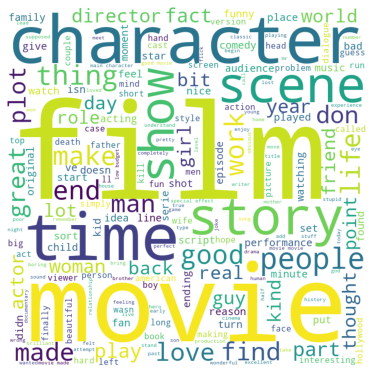

In [33]:
#library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in movie_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

> The above code was modified refering to the work of Lisa A. Chalaguine https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7?source=user_profile---------7----------------------------